# Visualizing GLCM

## Simple Tool To Create Visualization Of Perlin Noise.

1. Noise Texture Generation

Perlin Noise: Smooth Random Function i.e nth random number some how relating previous random number.


In [1]:
from skimage.feature import graycomatrix as glcm, graycoprops as gprops
import numpy as np
import random as rand

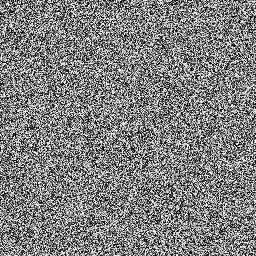

In [2]:
height = 256
width = 256
rough =  np.array([ [ 255 for i in range(width) ] for j in range(height) ], dtype=np.uint8)
from PIL import Image

for y in range(height):
    for x in range(width):
        rough[y][x] = rand.randint(0, 255)

Image.fromarray(rough)


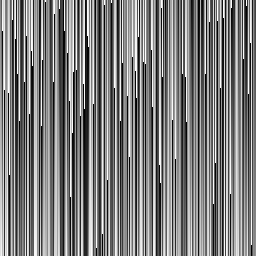

In [3]:
import math

height = 256
width = 256
smooth =  np.array([ [ 255 for i in range(width) ] for j in range(height) ], dtype=np.uint8)
from PIL import Image
for y in range(height):
    a = rand.randint(0, 255)
    b = rand.randint(0, 255)
    for x in range(width):
        dist = x / 255
        mag = abs(b - a)
        prop = mag * dist
        smooth[x][y] = prop + a 

Image.fromarray(smooth)


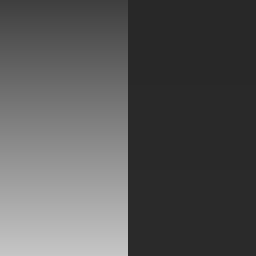

In [4]:
import math

height = 256
width = 256
smooth =  np.array([ [ 255 for i in range(width) ] for j in range(height) ], dtype=np.uint8)
from PIL import Image
smoothness = 0

def func(s):
    return ((math.sin(s) + 1)/2)*height


for y in range(height):
    if y % func(smoothness) == 0:
        a = rand.randint(0, 255)
        b = rand.randint(0, 255)
    for x in range(width):
        dist = x / 255
        mag = abs(b - a)
        prop = mag * dist
        smooth[x][y] = prop + a 

Image.fromarray(smooth)


In [7]:
%matplotlib auto
from ipywidgets import interact, widgets, interactive
import matplotlib.pyplot as plt
import copy



height = 256
width = 256
smooth =  np.array([ [ 255 for i in range(width) ] for j in range(height) ], dtype=np.uint8)
def smoother(u):
    func = lambda s : max(1, s)
    for y in range(height):
        if y % func(u) == 0:
            a = rand.randint(0, 255)
            b = rand.randint(0, 255)
        for x in range(width):
            dist = x / 255
            mag = abs(b - a)
            prop = mag * dist
            smooth[x][y] = prop + a 
    
    glcm2_x, glcm2 = glcm2d(smooth)
    glcm2_p = getprops(glcm2_x)
    
    vals=list(glcm2_p.values())
    keys=list(glcm2_p.keys())
    
    
    #fig, ax = plt.subplots(2, 2, figsize=(10, 20))
    #ax[0, 0].bar(x=keys[0], height=vals[0])
    #ax[0, 0].set_ylim(top=1000)
    #ax[0, 1].bar(x=keys[1:], height=vals[1:])
    #ax[1, 0].imshow(smooth)
    #ax[1, 1].imshow(glcm2)
    
    #display(Image.fromarray(getImagefromFig(fig)))
    
    #plt.clf()
    display(Image.fromarray(intract_combine(smooth, glcm2 * 100)))


slider = widgets.FloatSlider(min=1, max=height/100, step=0.00001)
slider.layout.width = "80%"

interactive(smoother,u=slider)



Using matplotlib backend: QtAgg


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


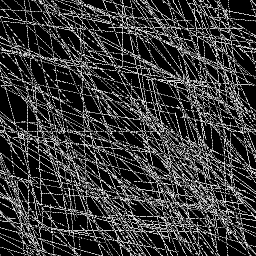

In [6]:
 def intract_combine(image1, image2):
    width = len(image1[0]) + len(image2[0])
    w1 = len(image1[0])
    height = len(image1)
    
    image = []
    
    for y in range(height):
        row = []
        for x in range(width):
            val = image1[y][x] if x < w1 else image2[y][x - w1]
            row += [ val ]
        image += [ row ]
    
    return np.array(image, dtype=np.uint8)
            

def getImagefromFig(fig):
    a = fig.canvas.print_to_buffer()
    img_width = a[1][0]
    img_height = a[1][1]
    img = [ [ [] for i in range(img_width) ] for j in range(img_height) ]
    color = []
    for i, x in enumerate(a[0]):
        ic = math.floor(i / 4)
        iw = ic % img_width
        ih = math.floor(ic / img_width)
        color += [ x ]
        if len(color) == 4:
            img[ih][iw] = color
            color = []

    return np.array(img, dtype=np.uint8)

def glcm2d(image):
    x_ = glcm(image, distances=[1], angles=[45], levels=256)
    x = x_.reshape(256,256)
    for _ in range(len(x)):
        for __ in range(len(x)):
            x[_][__] = min(255, x[_][__])
    return (x_, np.array(x, dtype=np.uint8))


glcm1 = glcm2d(smooth)[0]

def getprops(glcm_m):
    props = ["contrast", "dissimilarity", "homogeneity", "ASM", "energy", "correlation"]
    props_d = {}
    for p in props:
        props_d[p] = gprops(glcm_m, p).reshape(-1, )[0]
    return props_d
Image.fromarray(glcm1_i:=glcm2d(smooth)[1] * 100)